In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data.csv').iloc[:, 1:]

In [3]:
data

,text_amount,keyword_mentioned,commentNum,keyword_title_data,link_num_data,player_num_data,img_num_data,past_date,five_day_visitor,label
0,1915,16,0,1,1,1,15,26,22321,0
1,2605,7,9,1,0,0,73,48,12345,1
2,1565,7,10,1,0,0,7,9,2689,2
3,1592,5,0,1,0,0,4,4,269,3
4,1939,12,0,1,1,0,14,2,1488,4
...,...,...,...,...,...,...,...,...,...,...
47857,532,3,0,1,0,0,12,6,267,1013
47858,567,1,0,1,0,0,1,13,10350,1014
47859,2272,8,2,1,0,0,16,179,61469,1015
47860,1856,9,0,1,2,1,5,59,2426,1016


In [4]:
data['cls_label'] = data.apply(lambda x: 1 if x['label'] > 30 else 0, axis = 1)

In [24]:
data.head()

,text_amount,keyword_mentioned,commentNum,keyword_title_data,link_num_data,player_num_data,img_num_data,past_date,five_day_visitor,label,cls_label
0,1915,16,0,1,1,1,15,26,22321,0,0
1,2605,7,9,1,0,0,73,48,12345,1,0
2,1565,7,10,1,0,0,7,9,2689,2,0
3,1592,5,0,1,0,0,4,4,269,3,0
4,1939,12,0,1,1,0,14,2,1488,4,0


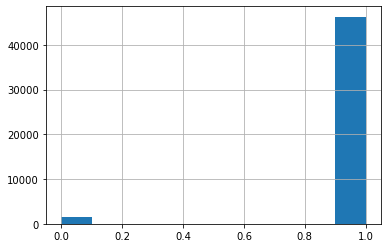

In [6]:
data['cls_label'].hist()

In [41]:
data1 = data.drop(['label'], axis = 1)
data2 = data1.drop(['cls_label'], axis=1)

In [46]:
data_txt = []
for i in data2.columns:
    data_txt.append(i)
print(data_txt)
#print(data2.columns[0])

['text_amount', 'keyword_mentioned', 'commentNum', 'keyword_title_data', 'link_num_data', 'player_num_data', 'img_num_data', 'past_date', 'five_day_visitor']


In [9]:
X, y = data1.iloc[:, :-1], data1.iloc[:, -1]

In [10]:
from collections import Counter
import matplotlib.pyplot as plt

def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    plt.bar(counter.keys(), counter.values())
    plt.show()

Class=0, n=1550 (50.000%)
Class=1, n=1550 (50.000%)


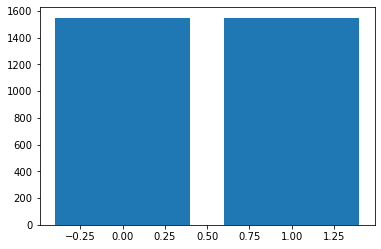

In [11]:
from imblearn.under_sampling import RandomUnderSampler
X_resampled, y_resampled = RandomUnderSampler(random_state=0).fit_resample(X, y)
count_and_plot(y_resampled)

In [12]:
X_resampled

,text_amount,keyword_mentioned,commentNum,keyword_title_data,link_num_data,player_num_data,img_num_data,past_date,five_day_visitor
0,1915,16,0,1,1,1,15,26,22321
1,2605,7,9,1,0,0,73,48,12345
2,1565,7,10,1,0,0,7,9,2689
3,1592,5,0,1,0,0,4,4,269
4,1939,12,0,1,1,0,14,2,1488
...,...,...,...,...,...,...,...,...,...
3095,1329,8,0,1,1,0,19,2,3186
3096,759,2,6,1,1,2,22,141,10147
3097,1088,4,4,1,1,0,18,7,5041
3098,1018,15,4,1,0,1,22,98,65116


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state =42, test_size = 0.20)

In [49]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

max = 0
max1 = 0
for i in range(2, 100):
    
    dtc = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=i)
    dtc.fit(X_train, y_train)
    if( (sum(dtc.predict(X_test) == y_test) / len(y_test)) >= max):
        max = (sum(dtc.predict(X_test) == y_test) / len(y_test))
        max1=i
        
print(max, max1)

0.7725806451612903 17


In [50]:
dtc = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=10)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10)

In [51]:
sum(dtc.predict(X_test) == y_test) / len(y_test)

0.7387096774193549

['text_amount >  839.50', 'past_date <= 10.50', 'class: 0']
상위 블로그의 조건입니다!

['five_day_visitor >  4185.50', 'text_amount <= 1614.00', 'class: 0']
상위 블로그의 조건입니다!

['text_amount >  1614.00', 'keyword_mentioned <= 13.50', 'class: 0']
상위 블로그의 조건입니다!

['keyword_mentioned >  13.50', 'class: 0']
상위 블로그의 조건입니다!



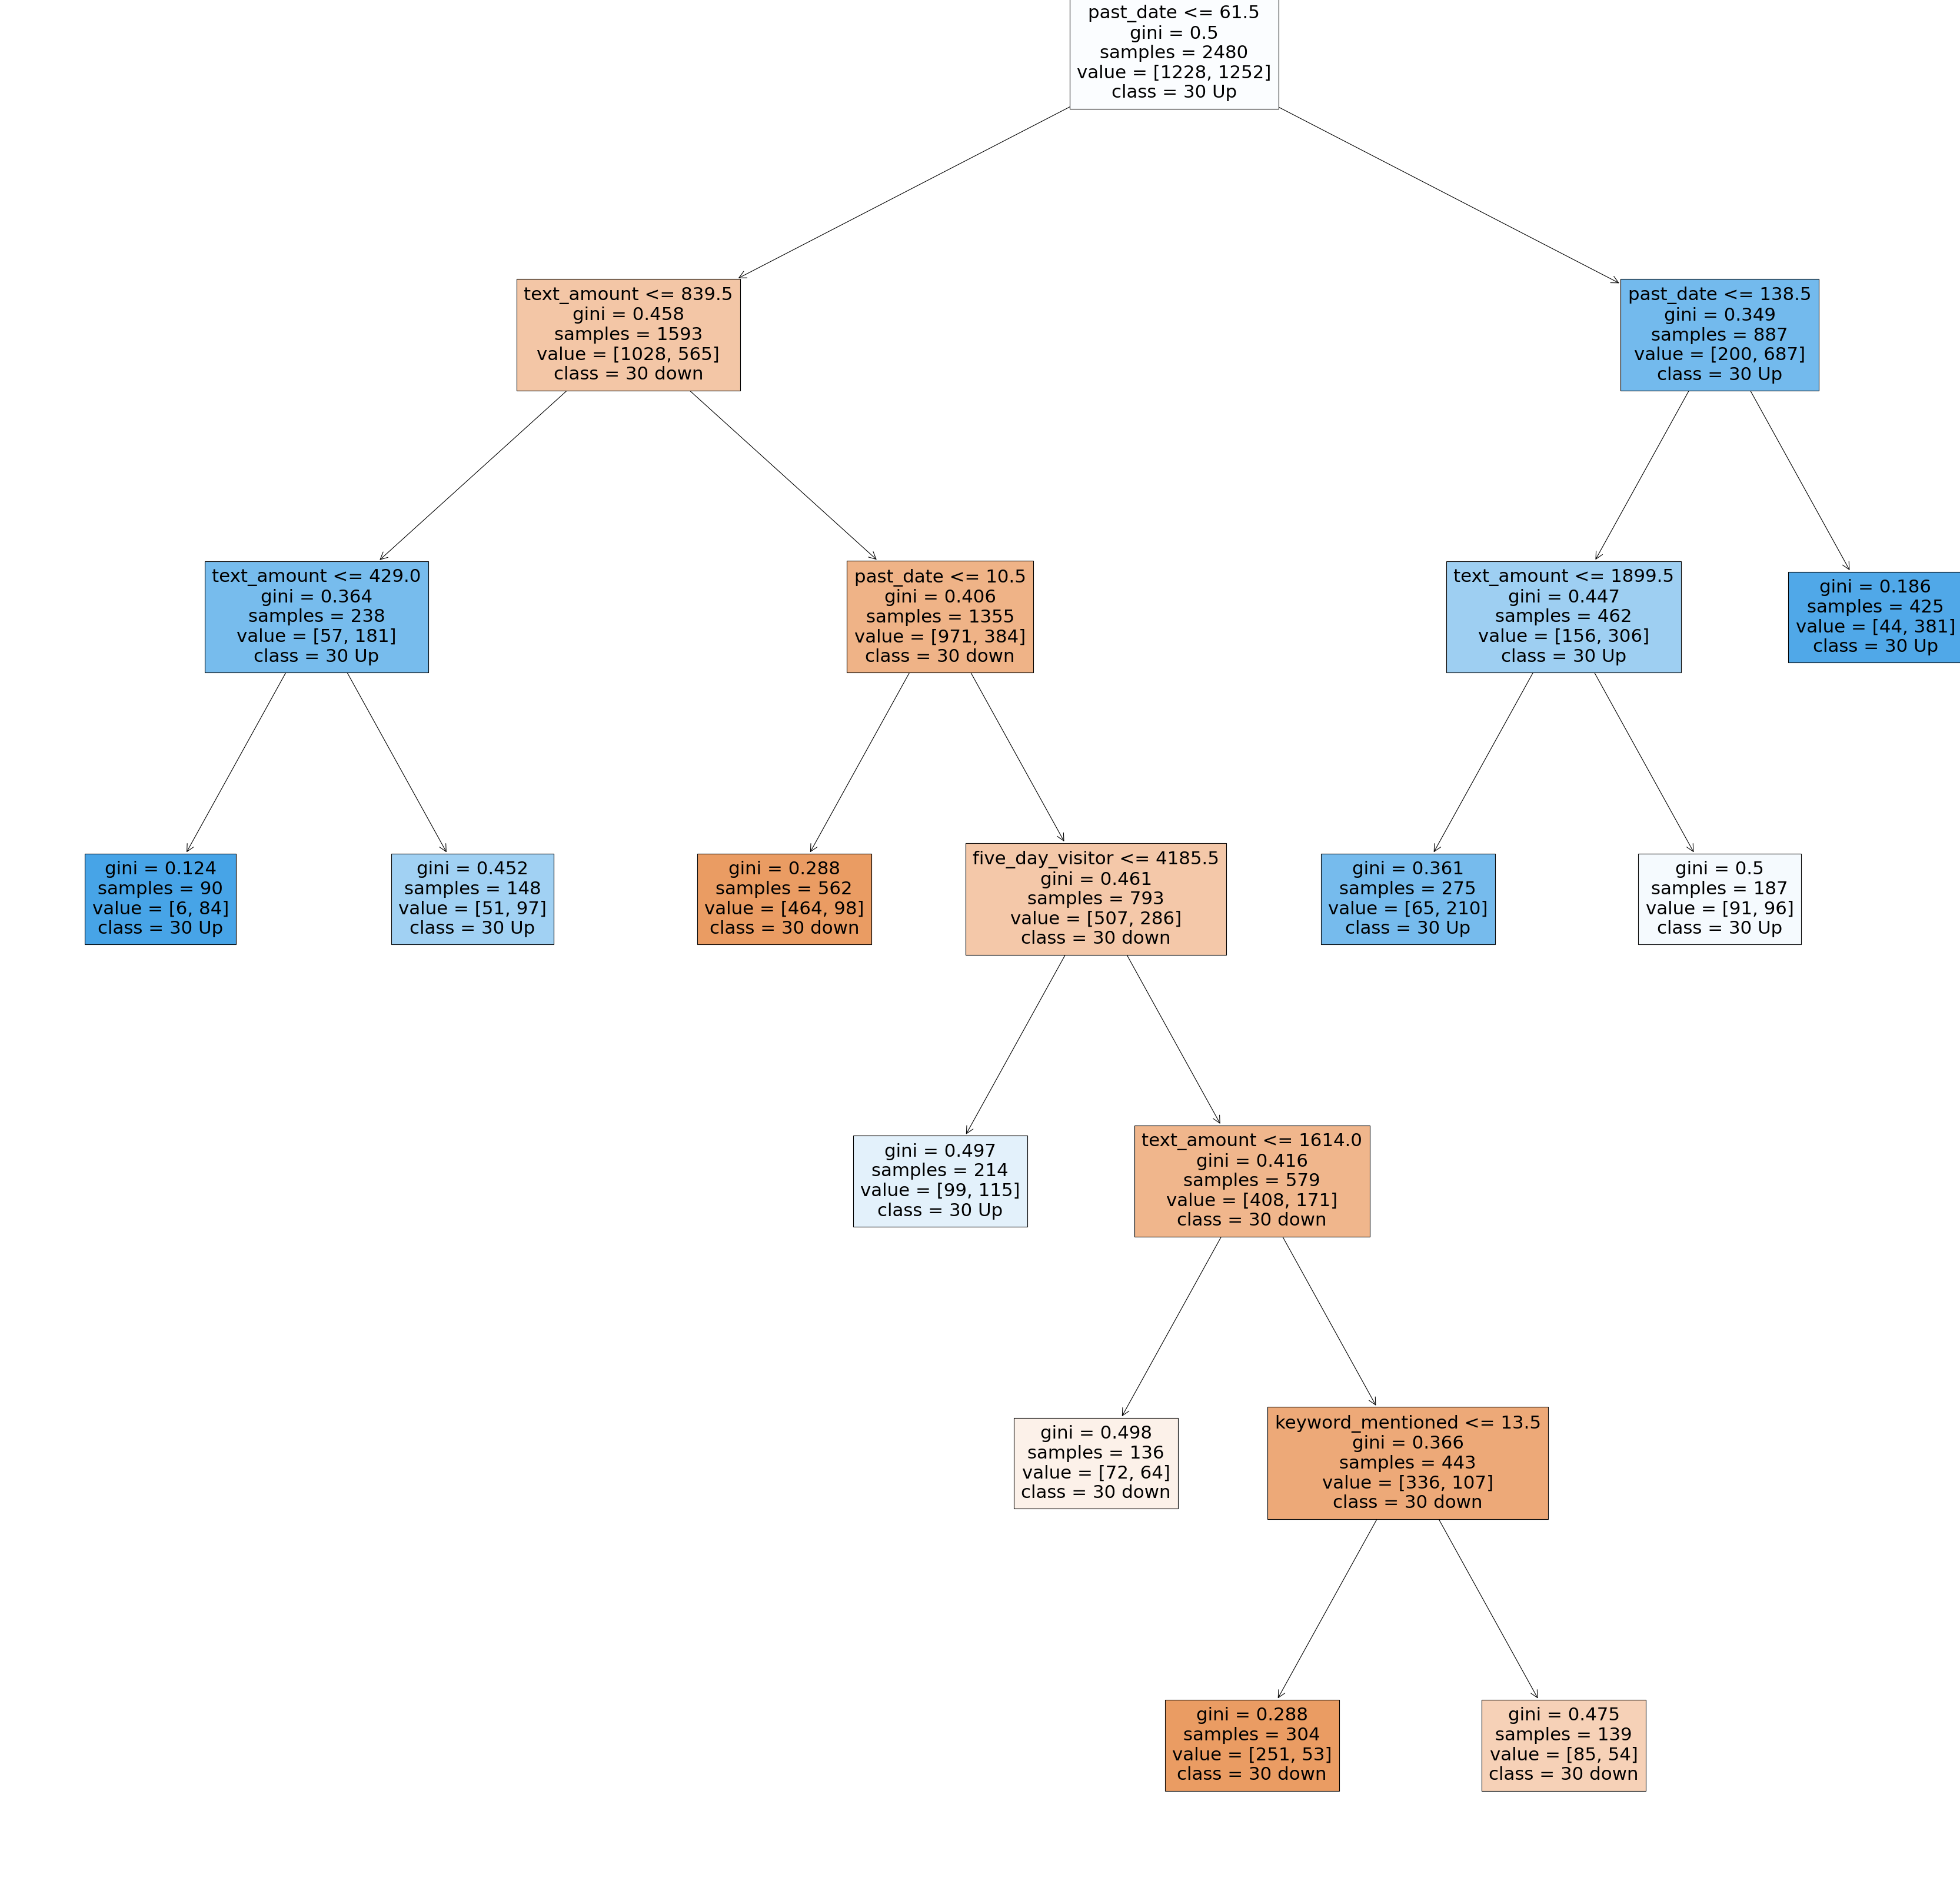

In [82]:
from sklearn.tree import export_text
import re

X.columns

fn=X.columns

cn=['30 down', '30 Up']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (50, 50), dpi=80)
plot_tree(dtc, feature_names = fn, class_names=cn, filled = True)
treetext = export_text(dtc, feature_names=data_txt)
#print(treetext)
#print(treetext.splitlines())
treetext1 = treetext.splitlines()
datatree = []
for i in treetext1:
    #print(i.split('- '))
    a = i.split('- ')
    #print(a[1])
    datatree.append(a[1])
    
#print(datatree)
#print('-----------------')
emp = []
for i in datatree:
    emp.append(i)
    if(re.search('class', i)):
        if(re.search('0', i)):
            print(emp)
            print('상위 블로그의 조건입니다!\n')
            emp = []
        else:
            emp = []